## Load the data:
Here, we will load the input features and the corresponding computed activation maps.

In [2]:
import os 
import numpy as np

def read_filename(main_path, folder):
    return os.listdir(main_path + folder)
    
def load_numpy(main_path, folder, name):
    return np.load(main_path + folder + '/' + name)

path = './data/CAMs/'
def_path = path + 'def-sRBC/'
nondef_path = path + 'nondef-sRBC/'


cell_folders = ['cell1', 'cell2', 'cell3']
cam_folders = ['heat-map1', 'heat-map2', 'heat-map3']


cell_container, cam_container = [], []

# original image for deformable cells
for ii in range(3):
    for image_name in read_filename(def_path, cell_folders[ii]):
        image = load_numpy(def_path, cell_folders[ii], image_name)
        cell_container.append([image_name, image, 'def'])

        
# heat maps for deformable cells
for ii in range(3):
    for cam_name in read_filename(def_path, cam_folders[ii]):
        cam = load_numpy(def_path, cam_folders[ii], cam_name)
        cam_container.append([cam_name, cam, 'def'])

# original image for nondeformable cells
for ii in range(3):
    for image_name in read_filename(nondef_path, cell_folders[ii]):
        image = load_numpy(nondef_path, cell_folders[ii], image_name)
        cell_container.append([image_name, image, 'nondef'])

# heat maps for nondeformable cells
for ii in range(3):
    for cam_name in read_filename(nondef_path, cam_folders[ii]):
        cam = load_numpy(nondef_path, cam_folders[ii], cam_name)
        cam_container.append([cam_name, cam, 'nondef'])
        

In [8]:
# names of the files
for ii in range(len(cell_container)):
    print( cell_container[ii][0] )

def1_col1_prob-0point999.npy
def1_col2_prob-0point999.npy
def1_col3_prob-0point948.npy
def1_col4_prob-0point3477Eneg16.npy
def2_col1_prob-0point999.npy
def2_col2_prob-0point999.npy
def2_col3_prob-0point874.npy
def2_col4_prob-0point5709Eneg5.npy
def3_col1_prob-0point999.npy
def3_col2_prob-0point970.npy
def3_col3_prob-0point988.npy
def3_col4_prob-0point1756Eneg4.npy
nondef1_col1_prob-0point849.npy
nondef1_col2_prob-0point790.npy
nondef1_col3_prob-0point614.npy
nondef1_col4_prob-0point7277Eneg2.npy
nondef2_col1_prob-0point978.npy
nondef2_col2_prob-0point716.npy
nondef2_col3_prob-0point629.npy
nondef2_col4_prob-0point7092Eneg3.npy
nondef3_col1_prob-0point956.npy
nondef3_col2_prob-0point573.npy
nondef3_col3_prob-0point466.npy
nondef3_col4_prob-0point2852Eneg2.npy


#### the corresponding probability tabuled during inference

In [4]:
probs = np.array([0.999, 0.999, 0.948, .347e-6,
         0.999, 0.999, 0.874, 0.571e-5,
        0.999, 0.970, 0.988, .176e-4,
        0.849, 0.790, 0.614, .728e-2, 
        0.978, 0.716, 0.629, 0.710e-3,
        0.956, 0.573, 0.466, 0.2852e-2])
probs = probs.reshape(6,4)
probs


array([[9.990e-01, 9.990e-01, 9.480e-01, 3.470e-07],
       [9.990e-01, 9.990e-01, 8.740e-01, 5.710e-06],
       [9.990e-01, 9.700e-01, 9.880e-01, 1.760e-05],
       [8.490e-01, 7.900e-01, 6.140e-01, 7.280e-03],
       [9.780e-01, 7.160e-01, 6.290e-01, 7.100e-04],
       [9.560e-01, 5.730e-01, 4.660e-01, 2.852e-03]])

#### Plotting the inputs features and corresponding activation maps:

C:\Users\npral\AppData\Local\Continuum\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


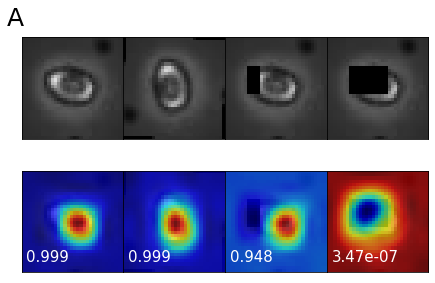

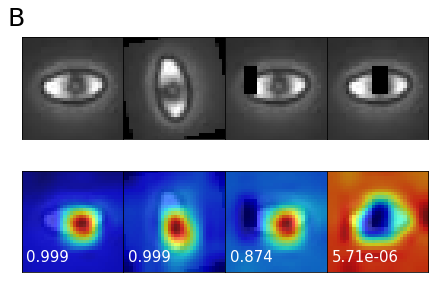

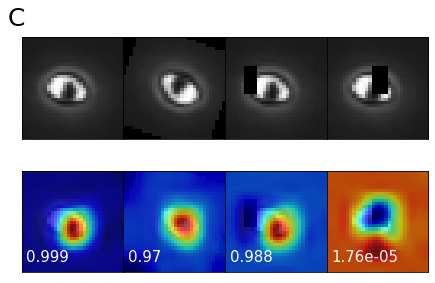

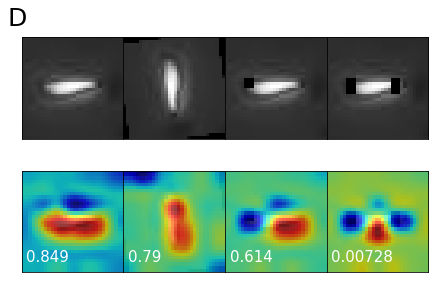

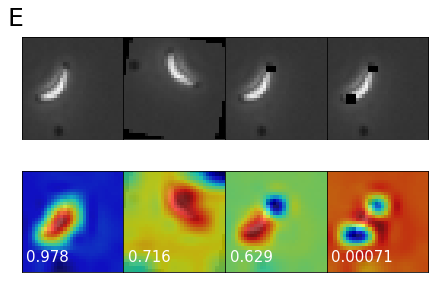

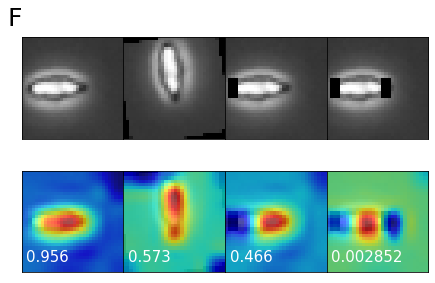

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb

def plot_cams(cell_container, cam_container, probs, letter):

    fig5 = plt.figure(constrained_layout=True)

    spec5 = fig5.add_gridspec(ncols=4, nrows=2, wspace = 0, hspace = 0)
    for row in range(2):
        for col in range(4):
            ax = fig5.add_subplot(spec5[row, col])
            if row == 0:
                im = ax.imshow(cell_container[col][1].astype('uint'))
            if row == 1:    
                im = ax.imshow(cell_container[col][1].astype('uint'))
                im = ax.imshow(cam_container[col][1], 'jet', alpha = 0.7)
                ax.text(1, 28, probs[col], size=15, color='white')

            ax.set(xticks=[], yticks=[])

    fig5.tight_layout()
    fig5.text(0,0.95, letter, size = 25, color = 'black')
    return

plot_cams(cell_container[0:4], cam_container[0:4], probs[0,:], 'A')
#plt.savefig('./activation-maps/deformable_cams1.svg')
plot_cams(cell_container[4:8], cam_container[4:8], probs[1,:], 'B')
#plt.savefig('./activation-maps/deformable_cams2.svg')
plot_cams(cell_container[8:12], cam_container[8:12], probs[2,:], 'C')
#plt.savefig('./activation-maps/deformable_cams3.svg')
plot_cams(cell_container[12:16], cam_container[12:16], probs[3,:], 'D')
#plt.savefig('./activation-maps/nondeformable_cams1.svg')
plot_cams(cell_container[16:20], cam_container[16:20], probs[4,:], 'E')
#plt.savefig('./activation-maps/nondeformable_cams2.svg')
plot_cams(cell_container[20:24], cam_container[20:24], probs[5,:], 'F')
#plt.savefig('./activation-maps/nondeformable_cams3.svg')